In [4]:
# Imports and Configuration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

import sys
project_root_nb = os.path.abspath(os.path.join(os.getcwd(), "..")) 
if project_root_nb not in sys.path:
    sys.path.insert(0, project_root_nb)

from analysis.utils.data_loading import (
    dispose_sa_engine_connections, 
    fetch_klines_df, 
    fetch_features_df,
    combine_klines_and_features
)

# --- Notebook Configuration ---
# --- Data Selection for Single-Symbol Analysis ---
TARGET_SYMBOL_NAME_SINGLE = "BTCUSDT" 
TARGET_KLINE_INTERVAL_SINGLE = "1h" 
TARGET_FEATURE_SET_VERSION_SINGLE = "v_test_01" # <<< CHANGE THIS TO YOUR DESIRED VERSION

FETCH_START_DATE_SINGLE = "2024-06-01 00:00:00"
FETCH_END_DATE_SINGLE = "2025-01-01 00:00:00"
FETCH_LIMIT_SINGLE = None 

# --- Plotting Style ---
plt.style.use('seaborn-v0_8-darkgrid') 
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

Fetching klines for BTCUSDT, Interval: 1h
Fetching klines from: klines_1hour for BTCUSDT (1h)

--- Base Klines DataFrame (BTCUSDT, first 5 rows) ---


,symbol_id,open_price,high_price,low_price,close_price,volume,quote_asset_volume
time,,,,,,,
2024-06-01 00:00:00+00:00,1,67540.01,67703.89,67507.39,67655.66,569.87074,3.853123e+07
2024-06-01 01:00:00+00:00,1,67655.66,67710.29,67428.44,67560.00,566.55975,3.827722e+07
2024-06-01 02:00:00+00:00,1,67560.00,67740.00,67546.52,67729.05,327.71958,2.217470e+07
2024-06-01 03:00:00+00:00,1,67729.05,67757.14,67623.24,67715.31,313.20132,2.120333e+07
2024-06-01 04:00:00+00:00,1,67715.31,67763.81,67656.00,67680.01,315.96397,2.139502e+07



--- Base Klines Info ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5137 entries, 2024-06-01 00:00:00+00:00 to 2025-01-01 00:00:00+00:00
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   symbol_id           5137 non-null   int64  
 1   open_price          5137 non-null   float64
 2   high_price          5137 non-null   float64
 3   low_price           5137 non-null   float64
 4   close_price         5137 non-null   float64
 5   volume              5137 non-null   float64
 6   quote_asset_volume  5137 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 321.1 KB


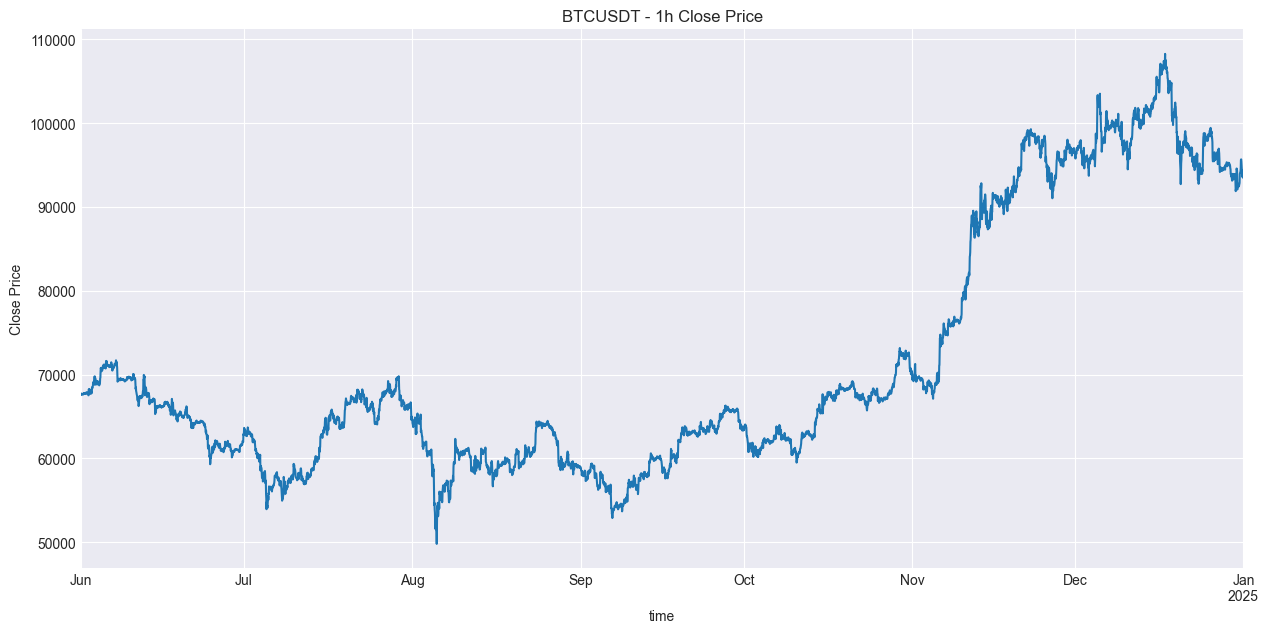

In [5]:
# Fetch and Inspect Base Kline Data
klines_df_single = pd.DataFrame() 
try:
    print(f"Fetching klines for {TARGET_SYMBOL_NAME_SINGLE}, Interval: {TARGET_KLINE_INTERVAL_SINGLE}")
    klines_df_single = fetch_klines_df(
        TARGET_SYMBOL_NAME_SINGLE, 
        TARGET_KLINE_INTERVAL_SINGLE, 
        FETCH_START_DATE_SINGLE, 
        FETCH_END_DATE_SINGLE, 
        FETCH_LIMIT_SINGLE
    )
    
    if not klines_df_single.empty:
        print(f"\n--- Base Klines DataFrame ({TARGET_SYMBOL_NAME_SINGLE}, first 5 rows) ---")
        display(klines_df_single.head())
        print(f"\n--- Base Klines Info ---")
        klines_df_single.info()
        
        plt.figure(figsize=(15, 7))
        klines_df_single['close_price'].plot(title=f'{TARGET_SYMBOL_NAME_SINGLE} - {TARGET_KLINE_INTERVAL_SINGLE} Close Price')
        plt.ylabel('Close Price')
        plt.grid(True)
        plt.show()
    else:
        print(f"No kline data found for {TARGET_SYMBOL_NAME_SINGLE}.")
        
except Exception as e:
    print(f"Error fetching/processing kline data for {TARGET_SYMBOL_NAME_SINGLE}: {e}")
    import traceback; traceback.print_exc()

In [6]:
# Fetch and Inspect Feature Data for Single Symbol
features_df_single = pd.DataFrame()
try:
    print(f"\nFetching features for {TARGET_SYMBOL_NAME_SINGLE}, Interval: {TARGET_KLINE_INTERVAL_SINGLE}")
    print(f"Feature Set Version: {TARGET_FEATURE_SET_VERSION_SINGLE}")
    
    features_df_single = fetch_features_df(
        TARGET_FEATURE_SET_VERSION_SINGLE,
        TARGET_SYMBOL_NAME_SINGLE, 
        TARGET_KLINE_INTERVAL_SINGLE,
        FETCH_START_DATE_SINGLE, 
        FETCH_END_DATE_SINGLE, 
        FETCH_LIMIT_SINGLE
    )
    
    if not features_df_single.empty:
        print(f"\n--- Features DataFrame ({TARGET_SYMBOL_NAME_SINGLE}, first 5 rows) ---")
        display(features_df_single.head(100))
        print(f"\n--- Features Info ---")
        features_df_single.info()
        print(f"\n--- Features Description ---")
        display(features_df_single.describe())
        print(f"\n--- Null Value Counts (Top 20) ---")
        print(features_df_single.isnull().sum().sort_values(ascending=False).head(20))
    else:
        print(f"No feature data found for {TARGET_SYMBOL_NAME_SINGLE} (Version: '{TARGET_FEATURE_SET_VERSION_SINGLE}').")
        
except Exception as e:
    print(f"Error fetching/processing feature data for {TARGET_SYMBOL_NAME_SINGLE}: {e}")
    import traceback; traceback.print_exc()


Fetching features for BTCUSDT, Interval: 1h
Feature Set Version: v_test_01
Fetching features from: "kline_features_v_test_01" for BTCUSDT (1h)

--- Features DataFrame (BTCUSDT, first 5 rows) ---


,symbol_id,base_interval,bbands_close_default_base_bbands_lower_20_2,bbands_close_default_base_bbands_middle_20_2,bbands_close_default_base_bbands_upper_20_2,ema_close_common_base_ema_100,ema_close_common_base_ema_12,ema_close_common_base_ema_200,ema_close_common_base_ema_21,ema_close_common_base_ema_26,ema_close_common_base_ema_50,ema_close_common_base_ema_9,ema_logret_momentum_base_ema_10,ema_logret_momentum_base_ema_21,ema_logret_momentum_base_ema_50,fwd_logret_10m,fwd_logret_12h,fwd_logret_14d,fwd_logret_15m,fwd_logret_1d,fwd_logret_1h,fwd_logret_2d,fwd_logret_2h,fwd_logret_30m,fwd_logret_3d,...,logret_close_standard_base_log_return_2p,logret_close_standard_base_log_return_3p,logret_close_standard_base_log_return_40p,logret_close_standard_base_log_return_5p,logret_close_standard_base_log_return_60p,logret_close_standard_base_log_return_base,macd_close_default_base_macd_12_26_9,macd_close_default_base_macdhist_12_26_9,macd_close_default_base_macdsignal_12_26_9,obv_default_base_obv,quote_asset_volume_base,qvol_sum_base_base_sum_10,qvol_sum_base_base_sum_20,qvol_sum_base_base_sum_50,rsi_close_variants_base_rsi_14,rsi_close_variants_base_rsi_21,rsi_close_variants_base_rsi_7,vol_std_logret_base_base_std_100,vol_std_logret_base_base_std_20,vol_std_logret_base_base_std_50,volume_base,volume_sum_base_base_sum_10,volume_sum_base_base_sum_20,volume_sum_base_base_sum_50,ingested_at
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-06-01 00:00:00+00:00,1,1h,66980.175921,67835.7920,68691.408079,68188.367350,67661.203121,68511.579454,67800.307586,67856.153470,68003.711872,67614.837435,0.000089,-0.000211,-0.000208,None,0.000917,None,None,0.003443,-0.001415,0.002485,0.001084,None,0.019696,...,0.002162,0.001342,-0.000492,-0.000374,-0.003578,0.001711,-194.950347,-10.081344,-184.869003,-11853.83289,3.853123e+07,7.342500e+08,1.662775e+09,3.826913e+09,44.959784,45.450998,48.645382,0.003796,0.003612,0.003590,569.87074,10900.60797,24510.26546,56192.41778,2025-05-20 22:21:23.928199+00:00
2024-06-01 01:00:00+00:00,1,1h,66975.673859,67791.6560,68607.638141,68175.924432,67645.633410,68502.111001,67778.461442,67834.216176,67986.311407,67603.869948,-0.000184,-0.000321,-0.000256,None,0.002366,None,None,0.002882,0.002499,0.013467,0.002296,None,0.024207,...,0.000296,0.000747,-0.002748,-0.002204,-0.004725,-0.001415,-188.582764,-2.971009,-185.611755,-12420.39264,3.827722e+07,6.605299e+08,1.657696e+09,3.834469e+09,42.985483,44.191706,43.605634,0.003790,0.003615,0.003595,566.55975,9804.69445,24442.83715,56304.97073,2025-05-20 22:21:23.928199+00:00
2024-06-01 02:00:00+00:00,1,1h,66978.686167,67764.5085,68550.330833,68167.075434,67658.466732,68494.418852,67773.969492,67826.426089,67976.222724,67628.905958,0.000304,-0.000064,-0.000148,None,0.001096,None,None,0.000062,-0.000203,0.010093,-0.000724,None,0.020612,...,0.001084,0.002795,-0.003140,0.002426,0.001389,0.002499,-167.959356,14.121920,-182.081275,-12092.67306,2.217470e+07,4.896770e+08,1.642652e+09,3.819005e+09,47.382786,46.920579,53.531294,0.003790,0.003653,0.003610,327.71958,7250.38216,24225.91234,56076.82491,2025-05-20 22:21:23.928199+00:00
2024-06-01 03:00:00+00:00,1,1h,66978.511546,67741.5245,68504.537454,68158.129584,67667.211850,68486.666525,67768.636811,67818.195267,67965.990853,67646.186767,0.000212,-0.000077,-0.000150,None,-0.000355,None,None,0.001095,-0.000521,0.009809,-0.000428,None,0.021258,...,0.002296,0.000881,-0.001501,0.003044,0.004977,-0.000203,-150.983416,24.878287,-175.861703,-12405.87438,2.120333e+07,4.512320e+08,1.598481e+09,3.798736e+09,47.065058,46.725594,52.652552,0.003785,0.003645,0.003581,313.20132,6677.63996,23581.21880,55777.17930,2025-05-20 22:21:23.928199+00:00
2024-06-01 04:00:00+00:00,1,1h,66977.277684,67718.7250,68460.172316,68148.661869,67669.180796,68478.640092,67760.579828,67807.959322,67954.775917,67652.951413,0.000078,-0.000117,-0.000165,None,0.000295,None,None,0.002547,0.000094,0.012189,0.000197,None,0.020202,...,-0.000724,0.001775,-0.006676,0.002071,0.00184


--- Features Info ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5137 entries, 2024-06-01 00:00:00+00:00 to 2025-01-01 00:00:00+00:00
Data columns (total 73 columns):
 #   Column                                        Non-Null Count  Dtype              
---  ------                                        --------------  -----              
 0   symbol_id                                     5137 non-null   int64              
 1   base_interval                                 5137 non-null   object             
 2   bbands_close_default_base_bbands_lower_20_2   5137 non-null   float64            
 3   bbands_close_default_base_bbands_middle_20_2  5137 non-null   float64            
 4   bbands_close_default_base_bbands_upper_20_2   5137 non-null   float64            
 5   ema_close_common_base_ema_100                 5137 non-null   float64            
 6   ema_close_common_base_ema_12                  5137 non-null   float64            
 7   ema_close_common_base_ema_200     

,symbol_id,bbands_close_default_base_bbands_lower_20_2,bbands_close_default_base_bbands_middle_20_2,bbands_close_default_base_bbands_upper_20_2,ema_close_common_base_ema_100,ema_close_common_base_ema_12,ema_close_common_base_ema_200,ema_close_common_base_ema_21,ema_close_common_base_ema_26,ema_close_common_base_ema_50,ema_close_common_base_ema_9,ema_logret_momentum_base_ema_10,ema_logret_momentum_base_ema_21,ema_logret_momentum_base_ema_50,fwd_logret_12h,fwd_logret_1d,fwd_logret_1h,fwd_logret_2d,fwd_logret_2h,fwd_logret_3d,fwd_logret_4h,fwd_logret_6h,fwd_logret_7d,fwd_vol_12h,fwd_vol_1d,...,logret_close_standard_base_log_return_20p,logret_close_standard_base_log_return_2p,logret_close_standard_base_log_return_3p,logret_close_standard_base_log_return_40p,logret_close_standard_base_log_return_5p,logret_close_standard_base_log_return_60p,logret_close_standard_base_log_return_base,macd_close_default_base_macd_12_26_9,macd_close_default_base_macdhist_12_26_9,macd_close_default_base_macdsignal_12_26_9,obv_default_base_obv,quote_asset_volume_base,qvol_sum_base_base_sum_10,qvol_sum_base_base_sum_20,qvol_sum_base_base_sum_50,rsi_close_variants_base_rsi_14,rsi_close_variants_base_rsi_21,rsi_close_variants_base_rsi_7,vol_std_logret_base_base_std_100,vol_std_logret_base_base_std_20,vol_std_logret_base_base_std_50,volume_base,volume_sum_base_base_sum_10,volume_sum_base_base_sum_20,volume_sum_base_base_sum_50
count,5137.0,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,...,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5.137000e+03,5.137000e+03,5.137000e+03,5.137000e+03,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000
mean,1.0,70155.627989,71276.168246,72396.708504,71073.878036,71297.001866,70807.677130,71274.342308,71261.862571,71201.800350,71304.664926,0.000064,0.000063,0.000063,0.000759,0.001536,0.000063,0.003179,0.000128,0.004787,0.000254,0.000381,0.011114,0.004739,0.004926,...,0.001271,0.000129,0.000192,0.002469,0.000319,0.003739,0.000065,35.139295,0.292543,34.846753,-74850.479382,9.194318e+07,9.194898e+08,1.839215e+09,4.595012e+09,50.990375,50.956285,51.110608,0.005171,0.004886,0.005063,1259.296717,12595.767519,25202.953512,63019.016840
std,0.0,14475.043030,14706.296702,14977.672437,14455.870911,14721.812253,14099.175202,14696.289214,14682.103674,14612.244136,14730.402432,0.001665,0.001141,0.000743,0.018147,0.025601,0.005447,0.036100,0.007600,0.045770,0.010654,0.012906,0.069087,0.002727,0.002348,...,0.023316,0.007600,0.009270,0.032646,0.011827,0.040811,0.005445,423.067591,125.875301,398.995738,81925.182437,9.951863e+07,7.291862e+08,1.300402e+09,2.838287e+09,11.935939,10.063431,16.109893,0.001655,0.002423,0.001984,1271.688095,8898.748477,15444.957345,31637.750468
min,1.0,48556.632840,53072.920000,54638.392453,55173.354135,52706.095055,56234.056022,54088.373336,54289.510155,54531.972431,52147.465835,-0.012878,-0.009219,-0.005703,-0.133344,-0.203794,-0.034761,-0.219083,-0.066251,-0.263920,-0.076254,-0.098258,-0.337530,0.000478,0.000824,...,-0.164498,-0.066251,-0.075745,-0.192827,-0.085748,-0.204940,-0.034761,-2319.577890,-798.737639,-2036.360417,-196227.845630,5.711681e+06,1.094197e+08,2.486945e+08,1.003126e+09,14.402371,17.567394,5.456309,0.002549,0.000781,0.001288,92.165510,1701.904990,3864.611170,15619.898460
25%,1.0,59983.618030,60789.571000,61775.253719,61219.746767,60786.753257,60978.806072,60864.931995,60885.937754,61063.308520,60801.130591,-0.000667,-0.000460,-0.000347,-0.008208,-0.012463,-0.002210,-0.019133,-0.003140,-0.023783,-0.004327,-0.005349,-0.034016,0.002908,0.003459,...,-0.011437,-0.003134,-0.003809,-0.017021,-0.004910,-0.021340,-0.


--- Null Value Counts (Top 20) ---
fwd_vol_5m                                   5137
fwd_vol_5d                                   5137
fwd_logret_5d                                5137
fwd_vol_30m                                  5137
fwd_vol_2h                                   5137
fwd_logret_5m                                5137
fwd_vol_1h                                   5137
fwd_logret_15m                               5137
fwd_vol_15m                                  5137
fwd_logret_30m                               5137
fwd_vol_10m                                  5137
fwd_logret_8h                                5137
fwd_logret_14d                               5137
fwd_logret_10m                               5137
logret_close_standard_base_log_return_5p        0
logret_close_standard_base_log_return_60p       0
logret_close_standard_base_log_return_3p        0
logret_close_standard_base_log_return_40p       0
logret_close_standard_base_log_return_2p        0
logret_close_s

In [7]:
# Combine Klines and Features for Single Symbol
combined_df_single = pd.DataFrame()
if not klines_df_single.empty and not features_df_single.empty:
    print(f"\n--- Combining Klines and Features for {TARGET_SYMBOL_NAME_SINGLE} ---")
    combined_df_single = combine_klines_and_features(klines_df_single, features_df_single)
    
    if not combined_df_single.empty:
        print(f"Combined DataFrame shape: {combined_df_single.shape}")
        print("\n--- Combined DataFrame (first 5 rows) ---")
        display(combined_df_single.head())
        
        # ... (null check logic from previous notebook version) ...
        key_feature_example = f"log_return_1p" 
        if key_feature_example in combined_df_single.columns:
            print(f"\nNulls in '{key_feature_example}' after join:")
            print(combined_df_single[['close', key_feature_example]].isnull().sum())
        else: # Fallback to find any feature
            potential_features = [f"log_return_{w}p" for w in [1,2,3,5,10]] + ['rsi_14', 'macd_line_12_26_9']
            found_feature = next((pf for pf in potential_features if pf in combined_df_single.columns), None)
            if found_feature:
                 print(f"\nNulls in '{found_feature}' after join:")
                 print(combined_df_single[['close', found_feature]].isnull().sum())

    else:
        print("Combination resulted in an empty DataFrame.")
elif klines_df_single.empty:
    print("Klines DataFrame for single symbol is empty. Cannot combine.")
elif features_df_single.empty:
    print("Features DataFrame for single symbol is empty. Cannot combine.")


--- Combining Klines and Features for BTCUSDT ---
Combined DataFrame shape: (5137, 77)

--- Combined DataFrame (first 5 rows) ---


,symbol_id,open_price,high_price,low_price,close_price,volume,quote_asset_volume,bbands_close_default_base_bbands_lower_20_2,bbands_close_default_base_bbands_middle_20_2,bbands_close_default_base_bbands_upper_20_2,ema_close_common_base_ema_100,ema_close_common_base_ema_12,ema_close_common_base_ema_200,ema_close_common_base_ema_21,ema_close_common_base_ema_26,ema_close_common_base_ema_50,ema_close_common_base_ema_9,ema_logret_momentum_base_ema_10,ema_logret_momentum_base_ema_21,ema_logret_momentum_base_ema_50,fwd_logret_10m,fwd_logret_12h,fwd_logret_14d,fwd_logret_15m,fwd_logret_1d,...,logret_close_standard_base_log_return_20p,logret_close_standard_base_log_return_2p,logret_close_standard_base_log_return_3p,logret_close_standard_base_log_return_40p,logret_close_standard_base_log_return_5p,logret_close_standard_base_log_return_60p,logret_close_standard_base_log_return_base,macd_close_default_base_macd_12_26_9,macd_close_default_base_macdhist_12_26_9,macd_close_default_base_macdsignal_12_26_9,obv_default_base_obv,quote_asset_volume_base,qvol_sum_base_base_sum_10,qvol_sum_base_base_sum_20,qvol_sum_base_base_sum_50,rsi_close_variants_base_rsi_14,rsi_close_variants_base_rsi_21,rsi_close_variants_base_rsi_7,vol_std_logret_base_base_std_100,vol_std_logret_base_base_std_20,vol_std_logret_base_base_std_50,volume_base,volume_sum_base_base_sum_10,volume_sum_base_base_sum_20,volume_sum_base_base_sum_50
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-06-01 00:00:00+00:00,1,67540.01,67703.89,67507.39,67655.66,569.87074,3.853123e+07,66980.175921,67835.7920,68691.408079,68188.367350,67661.203121,68511.579454,67800.307586,67856.153470,68003.711872,67614.837435,0.000089,-0.000211,-0.000208,None,0.000917,None,None,0.003443,...,-0.012645,0.002162,0.001342,-0.000492,-0.000374,-0.003578,0.001711,-194.950347,-10.081344,-184.869003,-11853.83289,3.853123e+07,7.342500e+08,1.662775e+09,3.826913e+09,44.959784,45.450998,48.645382,0.003796,0.003612,0.003590,569.87074,10900.60797,24510.26546,56192.41778
2024-06-01 01:00:00+00:00,1,67655.66,67710.29,67428.44,67560.00,566.55975,3.827722e+07,66975.673859,67791.6560,68607.638141,68175.924432,67645.633410,68502.111001,67778.461442,67834.216176,67986.311407,67603.869948,-0.000184,-0.000321,-0.000256,None,0.002366,None,None,0.002882,...,-0.012981,0.000296,0.000747,-0.002748,-0.002204,-0.004725,-0.001415,-188.582764,-2.971009,-185.611755,-12420.39264,3.827722e+07,6.605299e+08,1.657696e+09,3.834469e+09,42.985483,44.191706,43.605634,0.003790,0.003615,0.003595,566.55975,9804.69445,24442.83715,56304.97073
2024-06-01 02:00:00+00:00,1,67560.00,67740.00,67546.52,67729.05,327.71958,2.217470e+07,66978.686167,67764.5085,68550.330833,68167.075434,67658.466732,68494.418852,67773.969492,67826.426089,67976.222724,67628.905958,0.000304,-0.000064,-0.000148,None,0.001096,None,None,0.000062,...,-0.007985,0.001084,0.002795,-0.003140,0.002426,0.001389,0.002499,-167.959356,14.121920,-182.081275,-12092.67306,2.217470e+07,4.896770e+08,1.642652e+09,3.819005e+09,47.382786,46.920579,53.531294,0.003790,0.003653,0.003610,327.71958,7250.38216,24225.91234,56076.82491
2024-06-01 03:00:00+00:00,1,67729.05,67757.14,67623.24,67715.31,313.20132,2.120333e+07,66978.511546,67741.5245,68504.537454,68158.129584,67667.211850,68486.666525,67768.636811,67818.195267,67965.990853,67646.186767,0.000212,-0.000077,-0.000150,None,-0.000355,None,None,0.001095,...,-0.006765,0.002296,0.000881,-0.001501,0.003044,0.004977,-0.000203,-150.983416,24.878287,-175.861703,-12405.87438,2.120333e+07,4.512320e+08,1.598481e+09,3.798736e+09,47.065058,46.725594,52.652552,0.003785,0.003645,0.003581,313.20132,6677.63996,23581.21880,55777.17930
2024-06-01 04:00:00+00:00,1,67715.31,67763.81,67656.00,67680.01,315.96397,2.139502e+07,66977.277684,67718.7250,68460.172316,68148.661869,67669.180796,68478.640092,67760.579828,67807.959322,67954.775917,67652.951413,0.000078,-0.000117,-0.000165,None,0.000295,None,None,0.002547,...,-0.006715,-0.000724,0.001775,-0.006676,0.002071,0.00


--- Plotting Selected Features for BTCUSDT ---

Available columns in combined_df_single: ['symbol_id', 'open_price', 'high_price', 'low_price', 'close_price', 'volume', 'quote_asset_volume', 'bbands_close_default_base_bbands_lower_20_2', 'bbands_close_default_base_bbands_middle_20_2', 'bbands_close_default_base_bbands_upper_20_2', 'ema_close_common_base_ema_100', 'ema_close_common_base_ema_12', 'ema_close_common_base_ema_200', 'ema_close_common_base_ema_21', 'ema_close_common_base_ema_26', 'ema_close_common_base_ema_50', 'ema_close_common_base_ema_9', 'ema_logret_momentum_base_ema_10', 'ema_logret_momentum_base_ema_21', 'ema_logret_momentum_base_ema_50', 'fwd_logret_10m', 'fwd_logret_12h', 'fwd_logret_14d', 'fwd_logret_15m', 'fwd_logret_1d', 'fwd_logret_1h', 'fwd_logret_2d', 'fwd_logret_2h', 'fwd_logret_30m', 'fwd_logret_3d', 'fwd_logret_4h', 'fwd_logret_5d', 'fwd_logret_5m', 'fwd_logret_6h', 'fwd_logret_7d', 'fwd_logret_8h', 'fwd_vol_10m', 'fwd_vol_12h', 'fwd_vol_15m', 'fwd_vol_1d', 

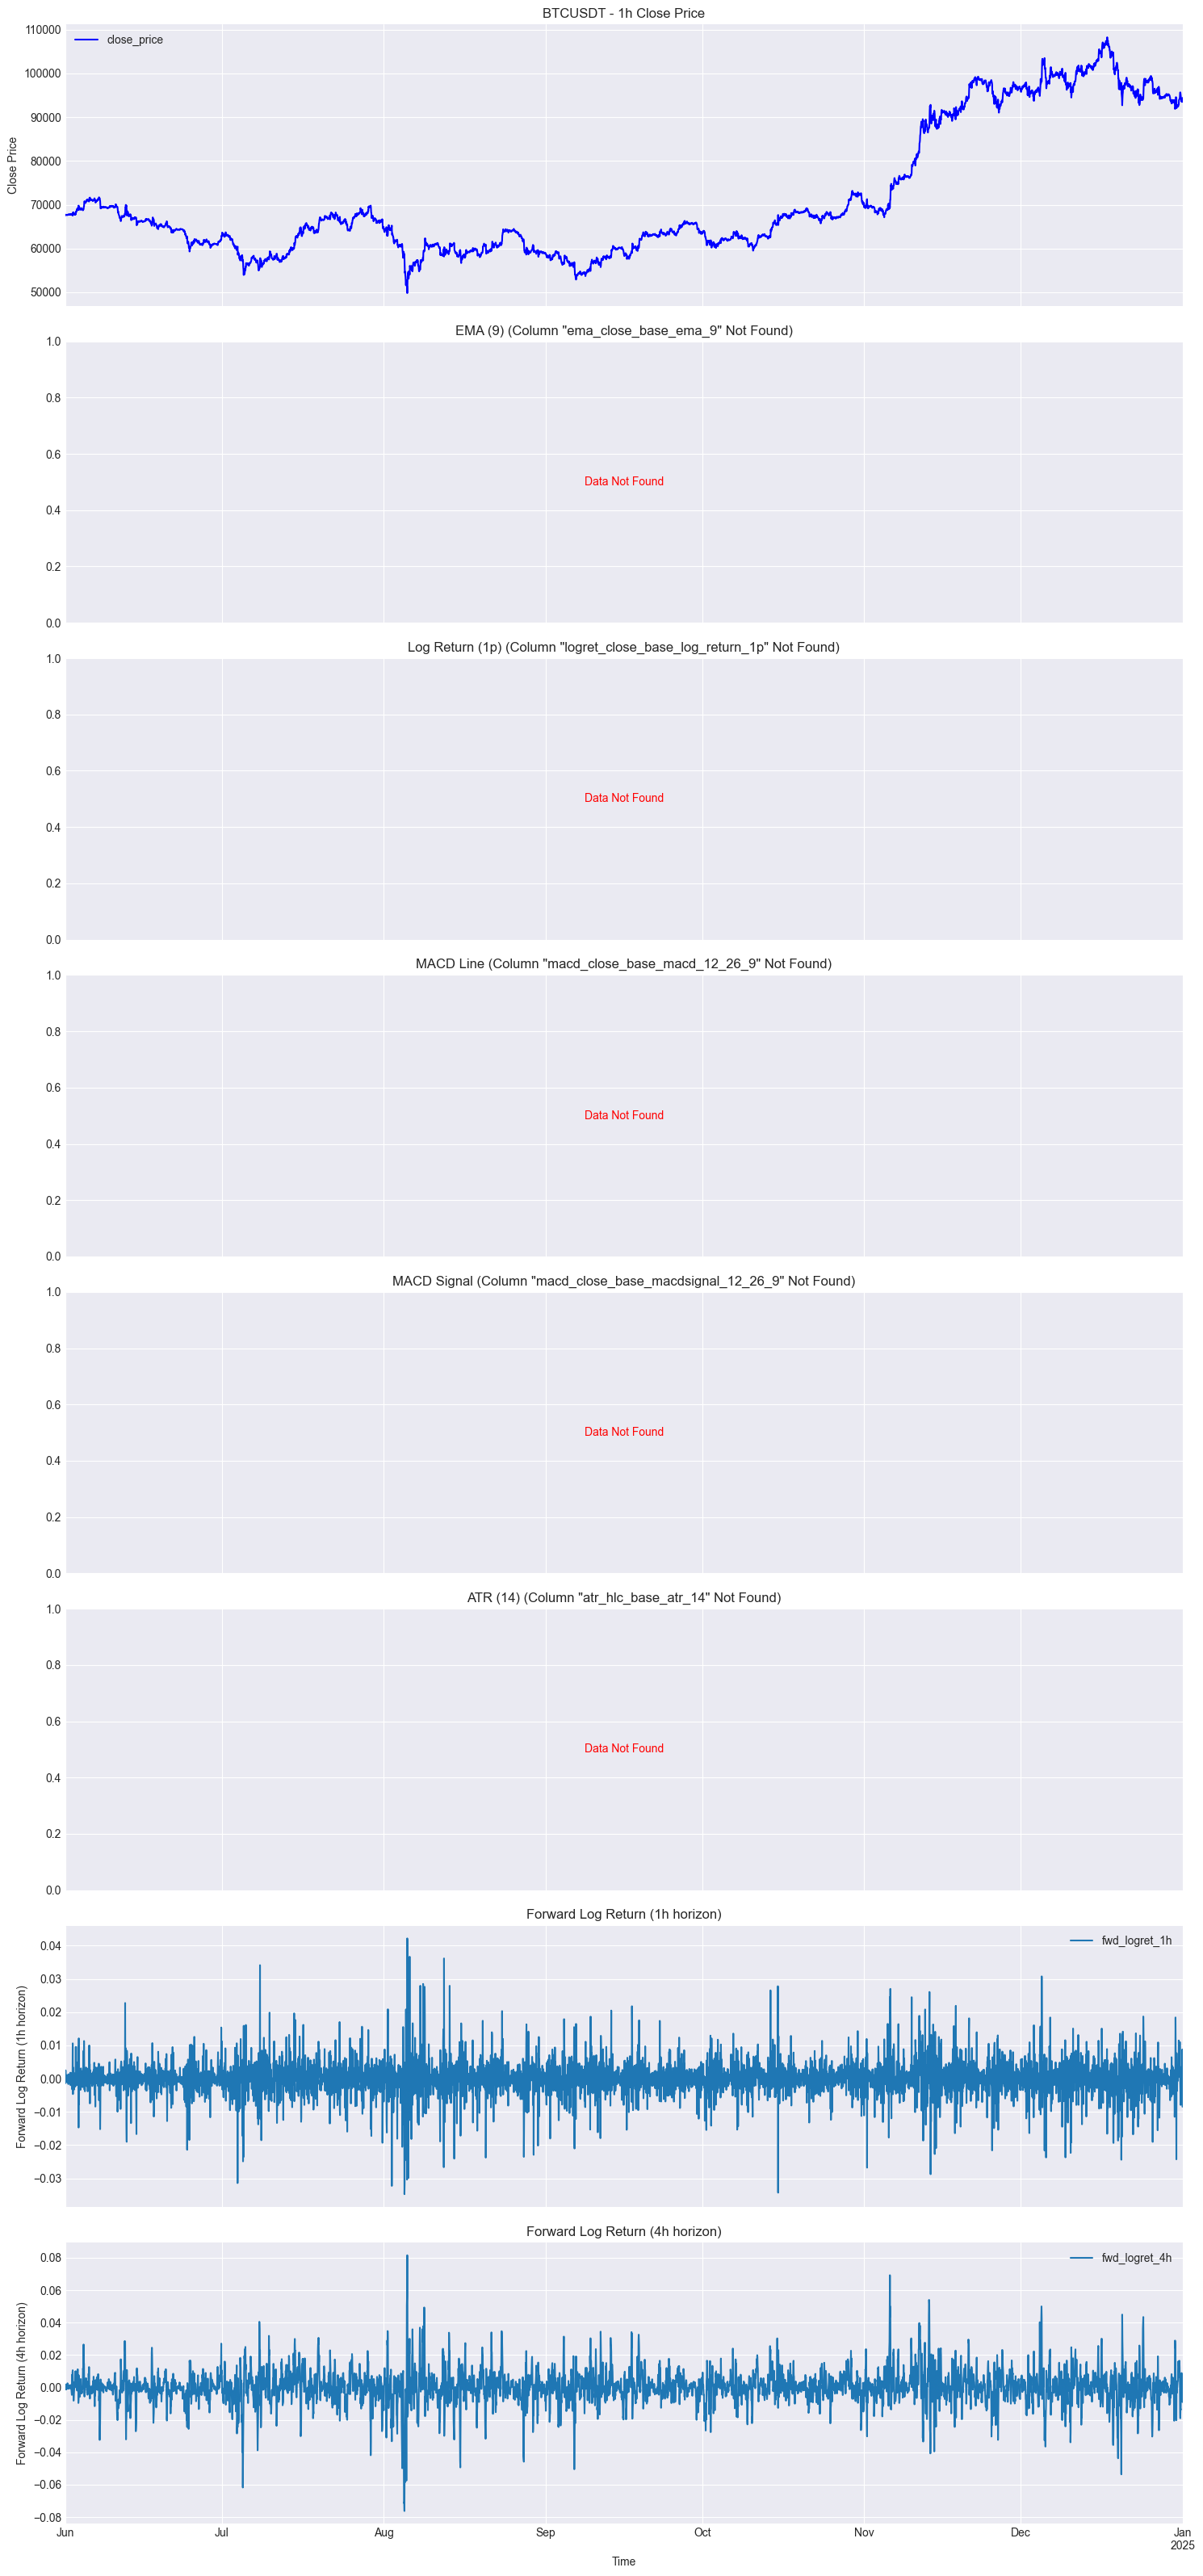

In [8]:
# Cell 6: Plotting Specific Features for Single Symbol

if not combined_df_single.empty:
    print(f"\n--- Plotting Selected Features for {TARGET_SYMBOL_NAME_SINGLE} ---")
    

    features_to_plot = {
        # --- Backward Examples  ---
        'EMA (9)': 'ema_close_base_ema_9',                     # Assuming 'emas_close' block with period 9
        'Log Return (1p)': 'logret_close_base_log_return_1p',  # Assuming 'log_returns_close' block with window 1
        'MACD Line': 'macd_close_base_macd_12_26_9',         # Assuming 'macd_close' block
        'MACD Signal': 'macd_close_base_macdsignal_12_26_9',   # Assuming 'macd_close' block
        'ATR (14)': 'atr_hlc_base_atr_14',                    # Assuming 'atr_hlc' block with period 14

        # --- Forward Examples  ---
        # These names depend on your FUTURE_HORIZON_CONFIG for the TARGET_KLINE_INTERVAL_SINGLE
        # For TARGET_KLINE_INTERVAL_SINGLE = "1h":
        'Forward Log Return (1h horizon)': 'fwd_logret_1h', 
        'Forward Log Return (4h horizon)': 'fwd_logret_4h',
    } 
    
    # It's good practice to verify which columns are actually available:
    print("\nAvailable columns in combined_df_single:", combined_df_single.columns.tolist())
    
    num_plots = len(features_to_plot)
    if num_plots == 0:
        print("No features selected to plot.")
    else:
        # Create an extra subplot for the close price
        fig, axes = plt.subplots(num_plots + 1, 1, figsize=(15, 4 * (num_plots + 1)), sharex=True) # Adjusted height factor
        
        # Plot Close Price
        if 'close_price' in combined_df_single.columns:
            combined_df_single['close_price'].plot(ax=axes[0], title=f'{TARGET_SYMBOL_NAME_SINGLE} - {TARGET_KLINE_INTERVAL_SINGLE} Close Price', legend=True, color='blue')
            axes[0].set_ylabel('Close Price')
        else:
            print("Warning: 'close_price' column not found in combined_df_single.")
            axes[0].set_visible(False)
        
        plot_idx = 1
        for display_name, col_name in features_to_plot.items():
            ax_current = axes[plot_idx] 
            if col_name in combined_df_single.columns:
                combined_df_single[col_name].plot(ax=ax_current, title=display_name, legend=True)
                ax_current.set_ylabel(display_name)
                print(f"Plotting: {display_name} ({col_name})")
            else:
                print(f"Warning: Feature column '{col_name}' for '{display_name}' not found. Skipping plot.")
                ax_current.set_title(f'{display_name} (Column "{col_name}" Not Found)')
                ax_current.text(0.5, 0.5, 'Data Not Found', horizontalalignment='center', verticalalignment='center', transform=ax_current.transAxes, color='red')
                # ax_current.set_visible(False) # Optionally hide if data not found
            plot_idx += 1

        plt.xlabel('Time')
        plt.tight_layout()
        plt.show()
else:
    print("Combined DataFrame for single symbol is empty. Skipping feature plotting.")


--- Feature Correlation Analysis for BTCUSDT ---


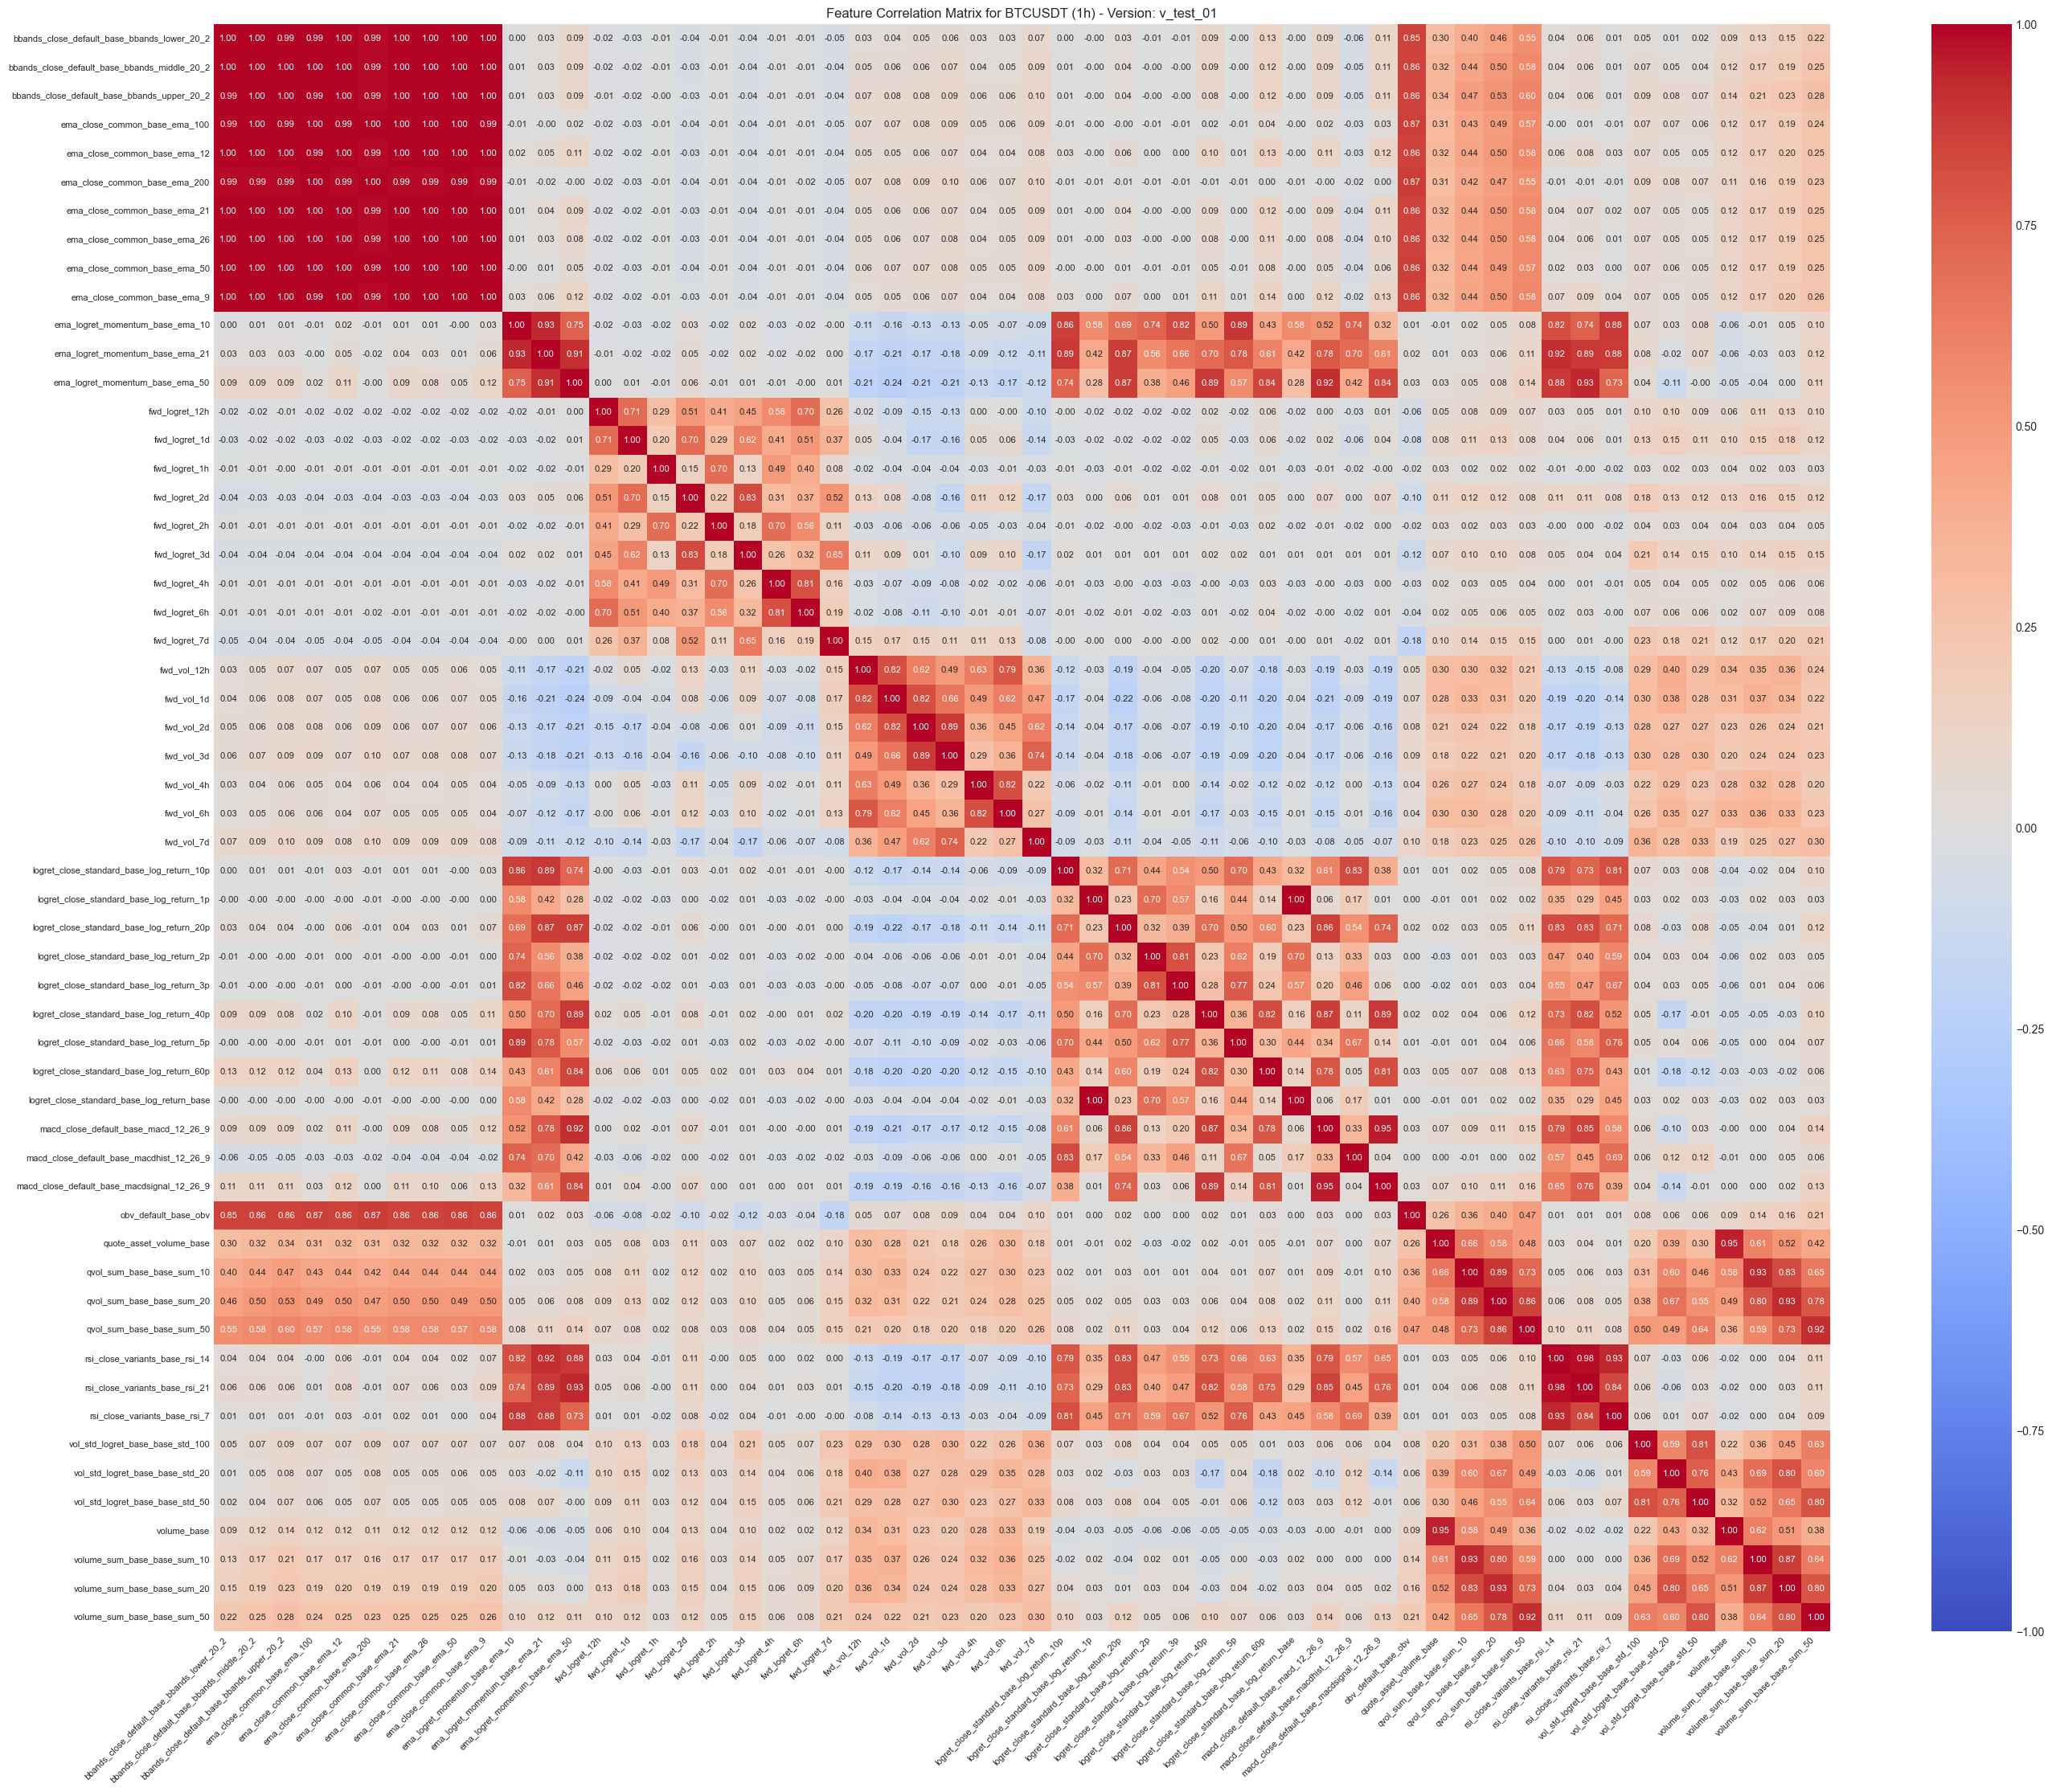

In [9]:
# Correlation Analysis for Single Symbol's Features
if not combined_df_single.empty:
    print(f"\n--- Feature Correlation Analysis for {TARGET_SYMBOL_NAME_SINGLE} ---")
    
    numeric_cols = combined_df_single.select_dtypes(include=np.number).columns.tolist()
    # Exclude kline data and metadata for a cleaner feature-only correlation
    cols_to_exclude_from_corr = ['open', 'high', 'low', 'close', 'volume', 'quote_asset_volume', 
                                 'symbol_id', 'ingested_at'] # Add other non-feature numerics
    
    # Select only columns that are likely features (exist in features_df_single)
    if not features_df_single.empty:
        feature_column_names_only = [col for col in features_df_single.columns if col not in ['time', 'symbol_id', 'interval', 'ingested_at']]
        numeric_feature_cols = [col for col in combined_df_single.columns if col in feature_column_names_only and col in numeric_cols]
    else: # Fallback if features_df_single was empty but combined_df_single somehow has features
        numeric_feature_cols = [col for col in numeric_cols if col not in cols_to_exclude_from_corr]

    if numeric_feature_cols:
        correlation_matrix = combined_df_single[numeric_feature_cols].corr()
        
        plt.figure(figsize=(max(12, len(numeric_feature_cols)*0.5), max(10, len(numeric_feature_cols)*0.4))) # Dynamic size
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, annot_kws={"size": 8})
        plt.title(f'Feature Correlation Matrix for {TARGET_SYMBOL_NAME_SINGLE} ({TARGET_KLINE_INTERVAL_SINGLE}) - Version: {TARGET_FEATURE_SET_VERSION_SINGLE}')
        plt.xticks(rotation=45, ha='right', fontsize=8)
        plt.yticks(fontsize=8)
        plt.tight_layout()
        plt.show()
    else:
        print("No suitable numeric feature columns found for correlation analysis.")
else:
    print("Combined DataFrame for single symbol is empty. Skipping correlation analysis.")

In [10]:
# Dispose SQLAlchemy Engine Connections
dispose_sa_engine_connections()
print("SQLAlchemy engine connections for analysis module disposed.")

Disposing SQLAlchemy engine connections (analysis utilities)...
SQLAlchemy engine connections disposed (analysis utilities).
SQLAlchemy engine connections for analysis module disposed.
